In [2]:
import pandas as pd

In [3]:
data = pd.read_excel('crop_csv_file.xlsx')

In [4]:
data.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Temperature,humidity,soil moisture,area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,36,35,45,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,37,40,46,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,36,41,50,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,37,42,55,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,36,40,54,720.0,165.0


In [5]:
data.head()
data = data[:10000]

In [6]:
data.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Temperature,humidity,soil moisture,area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,36,35,45,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,37,40,46,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,36,41,50,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,37,42,55,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,36,40,54,720.0,165.0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State_Name     10000 non-null  object 
 1   District_Name  10000 non-null  object 
 2   Crop_Year      10000 non-null  int64  
 3   Season         10000 non-null  object 
 4   Crop           10000 non-null  object 
 5   Temperature    10000 non-null  int64  
 6   humidity       10000 non-null  int64  
 7   soil moisture  10000 non-null  int64  
 8    area          10000 non-null  float64
 9   Production     9931 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 781.4+ KB


In [8]:
#handling missing data
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9931 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State_Name     9931 non-null   object 
 1   District_Name  9931 non-null   object 
 2   Crop_Year      9931 non-null   int64  
 3   Season         9931 non-null   object 
 4   Crop           9931 non-null   object 
 5   Temperature    9931 non-null   int64  
 6   humidity       9931 non-null   int64  
 7   soil moisture  9931 non-null   int64  
 8    area          9931 non-null   float64
 9   Production     9931 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 853.4+ KB


In [9]:
data.describe()

,Crop_Year,Temperature,humidity,soil moisture,area,Production
count,9931.000000,9931.000000,9931.000000,9931.000000,9931.000000,9.931000e+03
mean,2006.076025,34.445675,44.773034,53.108146,13299.452361,1.816847e+06
std,5.153237,3.499294,6.662943,5.259584,46476.817881,2.748270e+07
min,1997.000000,25.000000,35.000000,45.000000,0.200000,0.000000e+00
25%,2002.000000,34.000000,40.000000,50.000000,160.000000,2.045000e+02
50%,2006.000000,36.000000,42.000000,54.000000,1071.000000,1.776000e+03
75%,2011.000000,36.000000,50.000000,55.000000,6265.500000,1.321650e+04
max,2014.000000,37.000000,55.000000,62.000000,877029.000000,7.801620e+08


In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

State_Name = le.fit_transform(data.State_Name)
District_Name = le.fit_transform(data.District_Name)
Crop_Year = le.fit_transform(data.Crop_Year)
crop = le.fit_transform(data.Crop)
Season = le.fit_transform(data.Season)
data['State_Name'] = State_Name
data['District_Name'] = District_Name
data['Crop_Year'] = Crop_Year
data['Crop'] = crop
data['Season']  = Season

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [11]:
data.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Temperature,humidity,soil moisture,area,Production
0,0,9,3,1,0,36,35,45,1254.0,2000.0
1,0,9,3,1,41,37,40,46,2.0,1.0
2,0,9,3,1,51,36,41,50,102.0,321.0
3,0,9,3,3,3,37,42,55,176.0,641.0
4,0,9,3,3,10,36,40,54,720.0,165.0


In [22]:
data.to_excel('modified_data.xlsx', index=False)

In [12]:
from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import train_test_split

In [13]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [14]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.2,random_state=100)

In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_auc_score , classification_report, mean_squared_error, r2_score
forest = RandomForestRegressor(n_estimators=1000, 
                               criterion='mse', 
                               random_state=1, 
                               n_jobs=-1)
forest.fit(X_train, Y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(Y_train, y_train_pred),
        mean_squared_error(Y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(Y_train, y_train_pred),
        r2_score(Y_test, y_test_pred)))



InvalidParameterError: The 'criterion' parameter of RandomForestRegressor must be a str among {'squared_error', 'absolute_error', 'poisson', 'friedman_mse'}. Got 'mse' instead.

In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_auc_score, classification_report, mean_squared_error, r2_score

forest = RandomForestRegressor(n_estimators=1000, 
                               criterion='squared_error',  # Corrected criterion value
                               random_state=1, 
                               n_jobs=-1)

forest.fit(X_train, Y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(Y_train, y_train_pred),
        mean_squared_error(Y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(Y_train, y_train_pred),
        r2_score(Y_test, y_test_pred)))


MSE train: 7023640414606.193, test: 43311638797231.828
R^2 train: 0.990, test: 0.958


In [17]:
print(forest.score(X_test,Y_test))

0.9581139626404562


In [18]:
forest.predict(X_test)

array([6.39245193e+05, 2.97393199e+05, 8.57097100e+03, ...,
       8.04864000e+01, 1.12687002e+05, 7.71037200e+03])

In [19]:
X_test

,State_Name,District_Name,Crop_Year,Season,Crop,Temperature,humidity,soil moisture,area
6880,1,13,15,1,58,36,40,54,9896.0
9780,1,17,16,2,30,34,55,62,50712.0
6584,1,13,6,3,40,34,45,52,1660.0
2073,1,4,7,1,2,37,42,55,1840.0
123,0,10,13,2,60,34,55,62,109.0
...,...,...,...,...,...,...,...,...,...
3903,1,6,15,2,39,34,55,62,28.0
7686,1,14,17,2,24,36,35,45,4852.0
5839,1,11,7,1,35,35,50,59,126.0
2068,1,4,6,3,61,35,50,59,18768.0


In [20]:
forest.predict([[1,5,5,3,40,37,40,46,1359.0]])


C:\Users\User\anaconda3\envs\exe\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([7710.372])

In [21]:
state = input('enter state:')
district = input('enter district:')
year = input('enter year:')
season = input('enter season:')
crop = input('enter crop:')
Temperature = input('enter Temperature')
humidity= input('enter humidity')
soilmoisture= input('enter soilmoisture')
area = input('enter area')

out_1 = forest.predict([[float(state),
       float(district),
       float(year),
       float(season),
       float(crop),
       float(Temperature),
       float(humidity),
       float(soilmoisture),
       float(area)]])
print(out_1)
print('crop yield Production:',out_1)


enter state:1
enter district:1
enter year:1
enter season:1
enter crop:1
enter Temperature1
enter humidity1
enter soilmoisture1
enter area2


C:\Users\User\anaconda3\envs\exe\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


[44.035]
crop yield Production: [44.035]


# Fertilizer prediction

In [ ]:
# data_1 = pd.read_csv('ferlizer.csv')

In [ ]:
# data_1

In [ ]:
# n = data_1.iloc[:,0:1]
# p = data_1.iloc[:,1:2]
# k = data_1.iloc[:,2:3]
# amt_n = data_1.iloc[:,3:4]
# amt_p = data_1.iloc[:,4:5]
# amt_k = data_1.iloc[:,5:6]

In [ ]:
# X_n_train , X_n_test , y_n_train , y_n_test = train_test_split(n,amt_n,test_size=0.2,random_state=100)

In [ ]:
# X_p_train , X_p_test , y_p_train , y_p_test = train_test_split(p,amt_p,test_size=0.2,random_state=100)

In [ ]:
# X_k_train , X_k_test , y_k_train , y_k_test = train_test_split(k,amt_k,test_size=0.2,random_state=100)

In [ ]:
# from sklearn.neural_network import MLPRegressor
# clf_n = MLPRegressor(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
# clf_n.fit(X_n_train, y_n_train)
# y_n_pred = clf_n.predict(y_n_test)
# clf_n.score(y_n_test,y_n_pred)

In [ ]:
# clf_p = MLPRegressor(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
# clf_p.fit(X_p_train, y_p_train)
# y_p_pred = clf_n.predict(y_p_test)
# clf_p.score(y_p_test,y_p_pred)

In [ ]:
# clf_k = MLPRegressor(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
# clf_k.fit(X_p_train, y_k_train)
# y_k_pred = clf_n.predict(y_k_test)
# clf_k.score(y_k_test,y_k_pred)

In [ ]:
# n_i = float(input('enter nitrogen:'))
# p_i = float(input('enter posporus:'))
# k_i = float(input('enter pottasium:'))
# p_n = clf_n.predict([[n_i]])
# p_p = clf_p.predict([[p_i]])
# p_k = clf_k.predict([[k_i]])
# print('Amount of nitrogen Fertizer:',p_n)
# print('Amount of posporus Fertizer:',p_p)
# print('Amount of nitrogen Fertizer:',p_k)

# GUI

In [ ]:
# from tkinter import *
# from tkinter import ttk

# root = Tk()
# root.title('Crop Yield and fertilizer Prediction System')
# root.geometry('850x650')
# root.configure(background="purple2")
# var = StringVar()
# label = Label( root, textvariable = var,font=('arial',20,'bold'),bd=20,background="purple2")
# var.set('Crop Yield and fertilizer Prediction System')
# label.grid(row=0,columnspan=6)



# label_1 = ttk.Label(root, text ='state',font=("Helvetica", 16),background="Purple3")
# label_1.grid(row=11,column=0)
    
# Entry_1= Entry(root)
# Entry_1.grid(row=11,column=1)

# label_2 = ttk.Label(root, text ='district',font=("Helvetica", 16),background="Purple3")
# label_2.grid(row=12,column=0)
    
# Entry_2 = Entry(root)
# Entry_2.grid(row=12,column=1)
    
    
# label_3 = ttk.Label(root, text ='year',font=("Helvetica", 16),background="Purple3")
# label_3.grid(row=13,column=0)
    
# Entry_3 = Entry(root)
# Entry_3.grid(row=13,column=1)

# label_4 = ttk.Label(root, text ='season',font=("Helvetica", 16),background="Purple3")
# label_4.grid(row=14,column=0)
    
# Entry_4= Entry(root)
# Entry_4.grid(row=14,column=1)

# label_5 = ttk.Label(root, text ='crop',font=("Helvetica", 16),background="Purple3")
# label_5.grid(row=15,column=0)
    
# Entry_6 = Entry(root)
# Entry_6.grid(row=15,column=1)
    
    
# label_6 = ttk.Label(root, text ='Temperature',font=("Helvetica", 16),background="Purple3")
# label_6.grid(row=16,column=0)
    
# Entry_6 = Entry(root)
# Entry_6.grid(row=16,column=1)

# label_7 = ttk.Label(root, text ='humidity',font=("Helvetica", 16),background="Purple3")
# label_7.grid(row=17,column=0)
    
# Entry_7= Entry(root)
# Entry_7.grid(row=17,column=1)

# label_8 = ttk.Label(root, text ='soilmoisture',font=("Helvetica", 16),background="Purple3")
# label_8.grid(row=18,column=0)

# Entry_8 = Entry(root)
# Entry_8.grid(row=18,column=1)
    
    
# label_9 = ttk.Label(root, text ='area',font=("Helvetica", 16),background="Purple3")
# label_9.grid(row=19,column=0)
    
# Entry_9 = Entry(root)
# Entry_9.grid(row=19,column=1)


# def predict():
#     state = Entry_1.get()
#     district = Entry_2.get()
#     year = Entry_3.get()
#     season = Entry_4.get()
#     crop = Entry_5.get()
#     Temperature = Entry_6.get()
#     humidity = Entry_7.get()
#     soilmoisture = Entry_8.get()
#     area = Entry_9.get()
#     out = forest.predict([[float(state),
#        float(district),
#        float(year),
#        float(season),
#        float(crop),
#        float(Temperature),
#        float(humidity),
#        float(soilmoisture),
#        float(area)]])
    
#     output.delete(0,END)
#     output.insert(0,out)
   
        

# b1 = Button(root, text = 'predict',font=("Helvetica", 16),background="Purple3",command = predict)
# b1.grid(row=14,column=0)
    

# output = Entry(root)
# output.grid(row=20,column=1)
    
# root.mainloop()

In [24]:
# Training model 
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 5)
regressor.fit(X_train, Y_train)

# Predicting results
decisiontree_predict = regressor.predict(X_train)
decisiontree_predict
regressor.score(X_train, Y_train)

1.0

C:\Users\User\anaconda3\envs\exe\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\envs\exe\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Decision Tree Regression')

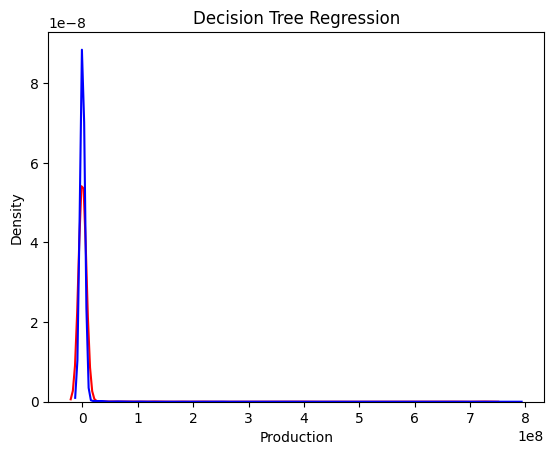

In [30]:
# Calculating R2 score :

# from sklearn.metrics import r2_score
# r2 = r2_score(Y_test,decisiontree_predict)
# print("R2 score : ",r2)

# # Calculating Adj. R2 score: 

# Adjr2_2 = 1 - (1-r)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)
# print("Adj. R-Squared : {}".format(Adjr2_2))

import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.distplot(Y_test, hist = False, color = "r", label = "Actual value ")
sns.distplot(decisiontree_predict, hist = False, color = "b", label = "Predicted Values", ax = ax)
plt.title('Decision Tree Regression')

In [36]:
preidict=regressor.predict([[1,5,5,3,40,37,40,46,1359.0]])
print(preidict)

# new_data = [[1, 5, 5, 3, 40, 37, 40, 46, 1359.0]]
# new_predictions = regressor.predict(new_data)
# print(new_predictions)

[6537.]


C:\Users\User\anaconda3\envs\exe\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [37]:
import pickle

with open('decision_tree.pkl', 'wb') as file:
    pickle.dump(regressor,file)